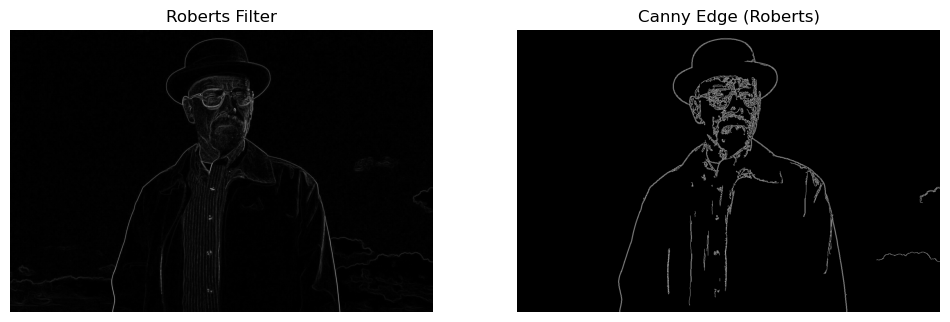

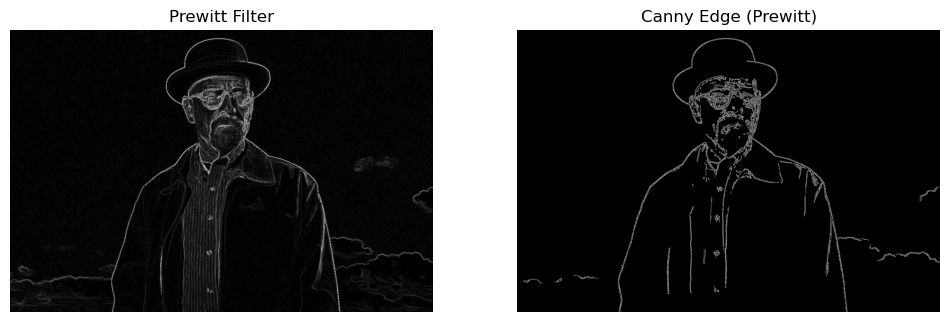

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_img(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Roberts Filter
def roberts_filter(img):
    rob_x = np.array([[1, 0], [0, -1]])
    rob_y = np.array([[0, 1], [-1, 0]])
    
    grad_x = cv2.filter2D(img, cv2.CV_64F, rob_x)
    grad_y = cv2.filter2D(img, cv2.CV_64F, rob_y)
    
    robert_filt = np.uint8(np.sqrt(np.square(grad_x) + np.square(grad_y)))
    return np.abs(grad_x), np.abs(grad_y), robert_filt

# Prewitt Filter
def prewitt_filter(img):
    pr_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    pr_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    grad_x = cv2.filter2D(img, cv2.CV_64F, pr_x)
    grad_y = cv2.filter2D(img, cv2.CV_64F, pr_y)
    
    prewitt_filt = np.uint8(np.sqrt(np.square(grad_x) + np.square(grad_y)))
    return np.abs(grad_x), np.abs(grad_y), prewitt_filt

# Process Image
def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0.5)  # Using OpenCV Gaussian Blur
    
    roberts_x, roberts_y, roberts_res = roberts_filter(blurred_img)
    prewitt_x, prewitt_y, prewitt_res = prewitt_filter(blurred_img)
    
    edges_roberts = cv2.Canny(roberts_res, 30, 150)  # Using OpenCV Canny Edge Detection
    edges_prewitt = cv2.Canny(prewitt_res, 150, 400)  
    
    show_img([roberts_res, edges_roberts], ['Roberts Filter', 'Canny Edge (Roberts)'])
    show_img([prewitt_res, edges_prewitt], ['Prewitt Filter', 'Canny Edge (Prewitt)'])

process_image("ww.jpg")
